In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 100

In [2]:
def col_rename(df, dict_rules, ip=True):
    z = df.rename(columns = dict_rules, inplace=ip)
    return z

In [3]:
def print_unique(df,col):
    return df[col].unique()

In [4]:
def fill_nans_with_means(df,col):
    ''' fills nans in column with median '''
    return df[col].fillna(c_df.income.mean()).round()

In [5]:
def make_lower(df,col):
    return df[col].str.lower()

In [6]:
def lower_case_column_names(df):
    ''' make columns lower case '''
    df.columns=[i.lower() for i in df.columns]
    return df

In [7]:
def strip_char(df,col,char):
    return list(map(lambda x: round(float(x.strip(char))/100,2)\
                                          if type(x)==str else round((x/100),2),df[col]))

In [8]:
def record_str_replace(df, col, dict_rules):
    return df[col].replace(dict_rules) # additional replacement


In [9]:
def get_between_slash_with_split(df,col,place):
    ''' returns middle entry in a string formatted by "a/b/c" and avoid nans '''
    z = [x[place] for x in data_col.str.split('/') if type(x) != float]
    return z

In [10]:
def get_between_slash(df,col,place):
    ''' returns middle entry in a string formatted by "a/b/cc" and avoid nans '''
    res  = list(
              map(lambda x : x[place] if type(x)==str else x, df[col])
    )
                
    return res

In [11]:
def get_between_slash_and_join(df,col):
    ''' returns middle entry in a string formatted by "a/b/cc" and avoid nans '''
    res  = list(
              map(lambda x : int(x[2]) if type(x)==str else x, df[col])
    )
                
    return res

In [12]:
def state(old_names, new_names):
    return c_df['st'].replace(old_names, new_names)

In [13]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3 = pd.read_csv('Data/file3.csv')

In [14]:
file1.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [15]:
file2.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Total Claim Amount', 'Policy Type', 'Vehicle Class'],
      dtype='object')

In [16]:
file3.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Education', 'Gender',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Total Claim Amount', 'Vehicle Class'],
      dtype='object')

In [17]:
col_rename(file3, {'State': 'ST'}) # rename State to ST

In [18]:
files = [file1,file2,file3]
files = list(map(lower_case_column_names,files)) # make the headers lowercase
c_df = pd.concat(files) # concat the data into a pandas frame
c_df = c_df.drop(labels=['customer'], axis=1) # drop customer label
c_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12074 entries, 0 to 7069
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   st                         9137 non-null   object 
 1   gender                     9015 non-null   object 
 2   education                  9137 non-null   object 
 3   customer lifetime value    9130 non-null   object 
 4   income                     9137 non-null   float64
 5   monthly premium auto       9137 non-null   float64
 6   number of open complaints  9137 non-null   object 
 7   policy type                9137 non-null   object 
 8   vehicle class              9137 non-null   object 
 9   total claim amount         9137 non-null   float64
dtypes: float64(3), object(7)
memory usage: 1.0+ MB


In [19]:
gender_old = print_unique(c_df,'gender')
gender_old = list(gender_old)
gender_old

[nan, 'F', 'M', 'Femal', 'Male', 'female']

In [20]:
gender_new = ['U','F','M','F','M','F']
gender_replace_rules = dict(zip(gender_old,gender_new))
c_df['gender']=record_str_replace(c_df,'gender',gender_replace_rules)
print_unique(c_df,'gender')

array(['U', 'F', 'M'], dtype=object)

In [21]:
state_old = print_unique(c_df,'st')
state_old = list(state_old)
state_old

['Washington',
 'Arizona',
 'Nevada',
 'California',
 'Oregon',
 'Cali',
 'AZ',
 'WA',
 nan]

In [22]:
state_new = ['Washington',
 'Arizona',
 'Nevada',
 'California',
 'Oregon',
 'California',
 'Arizona',
 'Washington', 'Unknown']
state_replace_rules = dict(zip(state_old,state_new))
c_df['st']=record_str_replace(c_df,'st',state_replace_rules)
print_unique(c_df,'st')

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon',
       'Unknown'], dtype=object)

In [23]:
c_df['number of open complaints'] = get_between_slash_and_join(c_df,'number of open complaints')
print_unique(c_df,'number of open complaints')

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [24]:
c_df['customer lifetime value'] = strip_char(c_df,'customer lifetime value','%')


In [25]:
c_df = c_df.drop_duplicates() # remove duplicates

In [26]:
c_df['customer lifetime value'] = fill_nans_with_means(c_df,'customer lifetime value').apply(round)
c_df['total claim amount']      = fill_nans_with_means(c_df,'total claim amount').apply(round)
c_df['monthly premium auto']    = fill_nans_with_means(c_df,'monthly premium auto').apply(round)
c_df['income']                  = fill_nans_with_means(c_df,'income').apply(round)

In [27]:
c_df.income = c_df.income.replace(0, c_df.income.mean()).round(0).astype(int)

In [28]:
c_df = c_df.drop_duplicates() # remove duplicates

In [29]:
len(c_df)

8875

In [30]:
old_st = ['California', 'Washington', 'Oregon', 'Arizon', 'Nevada'] 
new_st = ['West Region', 'East Region', 'Northeast Region', 'Central', 'Central']
c_df['st'] = state(old_st,new_st)

In [31]:
cols_to_lower = ['st','gender','policy type', 'vehicle class', 'education']

In [32]:
for col in cols_to_lower:
    c_df[col] = make_lower(c_df,col)

In [33]:
c_df.head(10)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east region,u,master,37823,37823,1000,0.0,personal auto,four-door car,3
1,arizona,f,bachelor,6980,37823,94,0.0,personal auto,four-door car,1131
2,central,f,bachelor,12887,48767,108,0.0,personal auto,two-door car,566
3,west region,m,bachelor,7646,37823,106,0.0,corporate auto,suv,530
4,east region,m,high school or below,5363,36357,68,0.0,personal auto,four-door car,17
5,northeast region,f,bachelor,8256,62902,69,0.0,personal auto,two-door car,159
6,northeast region,f,college,5381,55350,67,0.0,corporate auto,four-door car,322
7,arizona,m,master,7216,37823,101,0.0,corporate auto,four-door car,363
8,northeast region,m,bachelor,24128,14072,71,0.0,corporate auto,four-door car,511
9,northeast region,f,college,7388,28812,93,0.0,special auto,four-door car,426


In [34]:
len(c_df)

8875

In [35]:
file4 = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

In [36]:
file4.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [37]:
dates=list(print_unique(file4,'Effective To Date'))

In [38]:
date_ps = pd.Series(dates)
date_ps_mon = list(set([x[0] for x in date_ps.str.split('/')]))
date_ps_mon.sort()

In [39]:
date_ps_mon

['1', '2']

In [40]:
months = ['January','February']

In [41]:
dates_dict = dict(zip(date_ps_mon,months))
dates_dict

{'1': 'January', '2': 'February'}

In [42]:
file4['Effective To Date'] = [x[0] for x in file4['Effective To Date'].str.split('/')]

In [43]:
file4['Effective To Date'] = record_str_replace(file4, 'Effective To Date', dates_dict)

In [44]:
file4['Effective To Date']

0        February
1         January
2        February
3         January
4         January
           ...   
10905     January
10906     January
10907    February
10908    February
10909     January
Name: Effective To Date, Length: 10910, dtype: object

In [45]:
np.number

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,east region,u,master,37823,37823,1000,0.0,personal auto,four-door car,3
1,arizona,f,bachelor,6980,37823,94,0.0,personal auto,four-door car,1131
2,central,f,bachelor,12887,48767,108,0.0,personal auto,two-door car,566
3,west region,m,bachelor,7646,37823,106,0.0,corporate auto,suv,530
4,east region,m,high school or below,5363,36357,68,0.0,personal auto,four-door car,17
...,...,...,...,...,...,...,...,...,...,...
7065,west region,m,bachelor,234,71941,73,0.0,personal auto,four-door car,198
7066,west region,f,college,31,21604,79,0.0,corporate auto,four-door car,379
7067,west region,m,bachelor,82,37823,85,3.0,corporate auto,four-door car,791
7068,west region,m,college,75,21941,96,0.0,personal auto,four-door car,691


In [54]:
c_df.select_dtypes(include=np.number).columns.tolist()

['customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount']

In [55]:
c_df.select_dtypes(include=object).columns.tolist()

['st', 'gender', 'education', 'policy type', 'vehicle class']

In [59]:
numericals   = c_df.select_dtypes(include=np.number) # get numerical columns using the select_dtypes method
categoricals = c_df.select_dtypes(include=object)

In [101]:
numericals

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
0,37823,37823,1000,0.0,3
1,6980,37823,94,0.0,1131
2,12887,48767,108,0.0,566
3,7646,37823,106,0.0,530
4,5363,36357,68,0.0,17
...,...,...,...,...,...
7065,234,71941,73,0.0,198
7066,31,21604,79,0.0,379
7067,82,37823,85,3.0,791
7068,75,21941,96,0.0,691


/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

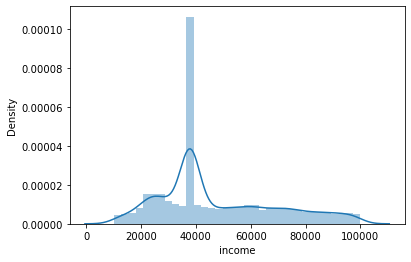

In [108]:
#fig,ax = plt.subplots(2,1,figsize=(10,8))
sns.distplot(numericals['income'])
#plt.title('Customer Lifetime Value', fontsize=18)

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'total claim amount'}>,
        <AxesSubplot:>]], dtype=object)

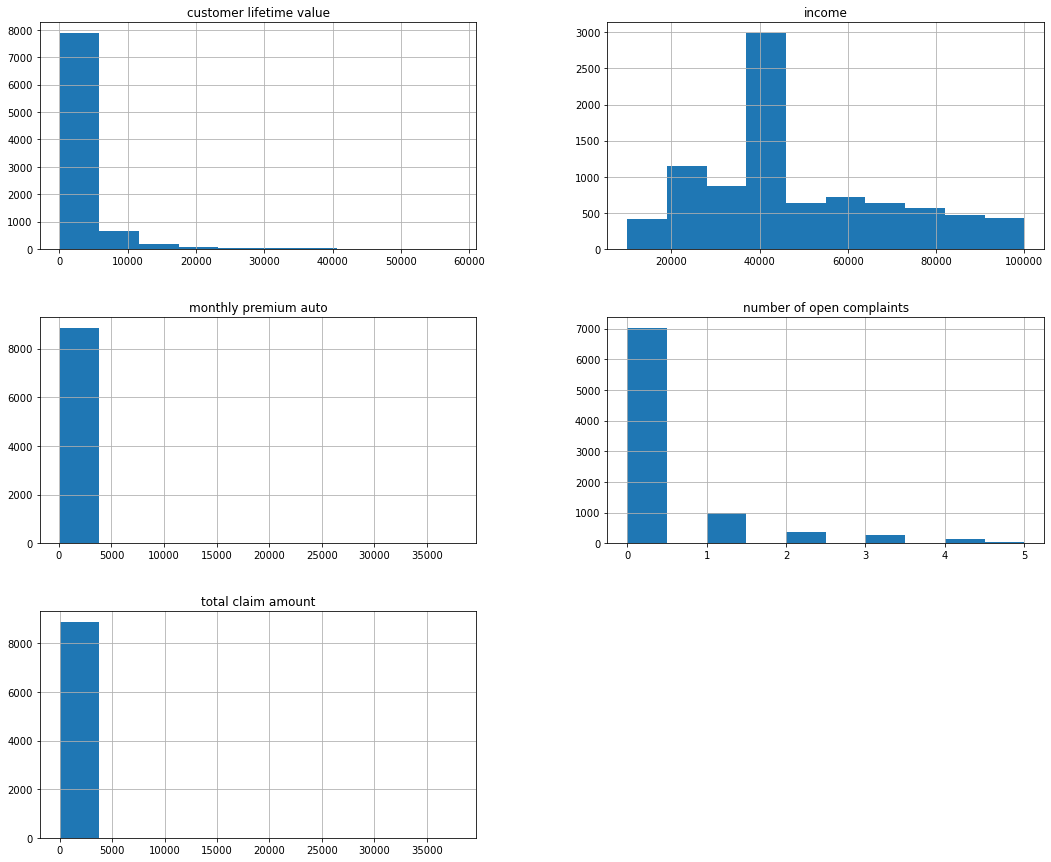

In [100]:
numericals.hist(figsize=(18,15))

/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total claim amount', ylabel='Density'>

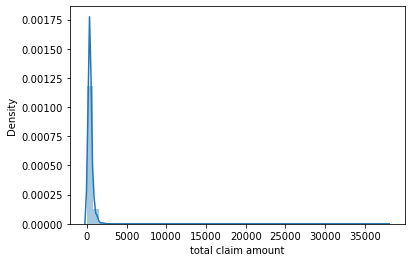

In [102]:
sns.distplot(numericals['total claim amount'])

/Users/antares/.pyenv/versions/mambaforge-4.10.1-4/envs/ih_DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 2000.0)

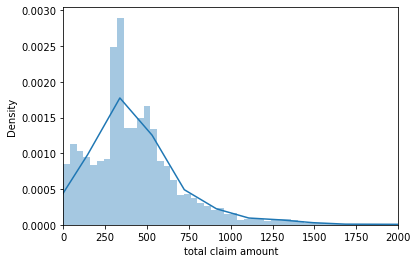

In [107]:
ax = sns.distplot(numericals['total claim amount'], kde=True, hist=True, hist_kws={"range": [0,2000]})
ax.set_xlim(0, 2000)